In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')


# set up formatting for x axis time values
monthfmt = DateFormatter("%b")
yearfmt = DateFormatter("%Y")

def combinedfmt(x,pos):
    string = monthfmt(x)
    if string == "Jan":
        string += "\n" + yearfmt(x)
    return string

def format_date_ax(ax):
    ax.xaxis.set_major_locator(MonthLocator((1,4,7,10)))
    ax.xaxis.set_major_formatter(FuncFormatter(combinedfmt))
    plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='center');
    return None

---

#### Original GOES ABI Brightness Temperature Summary Statistics

In [2]:
# open csv file with summary stats
df_original_tb = pd.read_csv('goes_modis_aster_original_tb_summary_stats.csv')
# set datetime to aster_datetime
df_original_tb['datetime'] = pd.to_datetime(df_original_tb.time.copy())
# uset this as the index
df_original_tb.set_index('datetime', inplace=True)

# add an R-squared column for each diff
df_original_tb['ast_mod_r2_value'] = df_original_tb.ast_mod_r_value.copy()**2
df_original_tb['ast_goes_r2_value'] = df_original_tb.ast_goes_r_value.copy()**2

# filter out anything with Number of Pixels < 45000

df_original_tb = df_original_tb.where(df_original_tb.ast_mod_n >= 45000)

# preview
df_original_tb.head(1)

,Unnamed: 0,time,aster_rad_filepath,modis_rad_filepath,goes_rad_filepath,goes_zones_filepath,goes_tb_filepath,ast_mod_n,ast_mod_mean_diff,ast_mod_median_diff,...,ast_subpx_goes_mean_squared_diff,ast_subpx_goes_rms_diff,ast_subpx_goes_std_diff,ast_subpx_goes_slope,ast_subpx_goes_intercept,ast_subpx_goes_r_value,ast_subpx_goes_p_value,ast_subpx_goes_std_err,ast_mod_r2_value,ast_goes_r2_value
datetime,,,,,,,,,,,,,,,,,,,,,
2017-03-04 18:51:03,0.0,2017-03-04 18:51:03,/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...,/storage/MODIS/Tuolumne_MOD021KM/MOD021KM.A201...,/storage/GOES/orthorectified/2017/03/4/ABI-L1b...,/storage/GOES/orthorectified/2017/03/4/ABI-L1b...,/storage/GOES/orthorectified/2017/03/4/ABI-L1b...,110383.0,0.932183,0.155824,...,59.968021,7.743902,7.340817,0.372126,167.634429,0.431615,0.0,0.002341,0.591096,0.226214


In [3]:
drop_idx_list = [df_original_tb.index[i] for i in [0, 1, 4, 8, 10, 12, 16, 18, 22, 23, 25, 26, 27, 34, 36, 42, 43]]

In [4]:
df_original_tb.drop(drop_idx_list, inplace=True)

In [5]:
df_original_tb.keys()

Index(['Unnamed: 0', 'time', 'aster_rad_filepath', 'modis_rad_filepath',
       'goes_rad_filepath', 'goes_zones_filepath', 'goes_tb_filepath',
       'ast_mod_n', 'ast_mod_mean_diff', 'ast_mod_median_diff',
       'ast_mod_mean_squared_diff', 'ast_mod_rms_diff', 'ast_mod_std_diff',
       'ast_mod_slope', 'ast_mod_intercept', 'ast_mod_r_value',
       'ast_mod_p_value', 'ast_mod_std_err', 'ast_subpx_mod_n',
       'ast_subpx_mod_mean_diff', 'ast_subpx_mod_median_diff',
       'ast_subpx_mod_mean_squared_diff', 'ast_subpx_mod_rms_diff',
       'ast_subpx_mod_std_diff', 'ast_subpx_mod_slope',
       'ast_subpx_mod_intercept', 'ast_subpx_mod_r_value',
       'ast_subpx_mod_p_value', 'ast_subpx_mod_std_err', 'ast_goes_n',
       'ast_goes_mean_diff', 'ast_goes_median_diff',
       'ast_goes_mean_squared_diff', 'ast_goes_rms_diff', 'ast_goes_std_diff',
       'ast_goes_slope', 'ast_goes_intercept', 'ast_goes_r_value',
       'ast_goes_p_value', 'ast_goes_std_err', 'ast_subpx_goes_n',
     

#### Orthorectified GOES ABI Brightness Temperature Summary Statistics

In [6]:
# open csv file with summary stats
df_ortho_tb = pd.read_csv('goes_modis_aster_orthorectified_tb_summary_stats.csv')
# set datetime to aster_datetime
df_ortho_tb['datetime'] = pd.to_datetime(df_ortho_tb.time.copy())
# uset this as the index
df_ortho_tb.set_index('datetime', inplace=True)

# add an R-squared column for each diff
df_ortho_tb['ast_mod_r2_value'] = df_ortho_tb.ast_mod_r_value.copy()**2
df_ortho_tb['ast_goes_r2_value'] = df_ortho_tb.ast_goes_r_value.copy()**2

# filter out anything with Number of Pixels < 45000
df_ortho_tb = df_ortho_tb.where(df_ortho_tb.ast_mod_n >= 45000)
df_ortho_tb.drop(drop_idx_list, inplace=True)
# preview
#df_ortho_tb.head(1)

In [7]:
df_ortho_tb

,Unnamed: 0,time,aster_rad_filepath,modis_rad_filepath,goes_rad_filepath,goes_zones_filepath,goes_tb_filepath,ast_mod_n,ast_mod_mean_diff,ast_mod_median_diff,...,ast_subpx_goes_mean_squared_diff,ast_subpx_goes_rms_diff,ast_subpx_goes_std_diff,ast_subpx_goes_slope,ast_subpx_goes_intercept,ast_subpx_goes_r_value,ast_subpx_goes_p_value,ast_subpx_goes_std_err,ast_mod_r2_value,ast_goes_r2_value
datetime,,,,,,,,,,,,,,,,,,,,,
2017-04-21 18:51:07,2.0,2017-04-21 18:51:07,/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...,/storage/MODIS/Tuolumne_MOD021KM/MOD021KM.A201...,/storage/GOES/orthorectified/2017/03/4/ABI-L1b...,/storage/GOES/orthorectified/2017/03/4/ABI-L1b...,/storage/GOES/orthorectified/2017/03/4/ABI-L1b...,46072.0,-0.363261,-0.324419,...,15.000525,3.873051,3.141026,0.399373,167.653648,0.355815,0.000000e+00,0.004887,0.231232,0.282020
2017-05-23 18:51:10,3.0,2017-05-23 18:51:10,/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...,/storage/MODIS/Tuolumne_MOD021KM/MOD021KM.A201...,/storage/GOES/orthorectified/2017/03/4/ABI-L1b...,/storage/GOES/orthorectified/2017/03/4/ABI-L1b...,/storage/GOES/orthorectified/2017/03/4/ABI-L1b...,110485.0,0.173606,-0.008810,...,36.512864,6.042588,5.385573,0.442560,158.757047,0.694749,0.000000e+00,0.001378,0.447842,0.831107
2017-06-07 06:07:19,5.0,2017-06-07 06:07:19,/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...,/storage/MODIS/Tuolumne_MOD021KM/MOD021KM.A201...,/storage/GOES/orthorectified/2017/03/4/ABI-L1b...,/storage/GOES/orthorectified/2017/03/4/ABI-L1b...,/storage/GOES/orthorectified/2017/03/4/ABI-L1b...,53858.0,-0.122212,0.025054,...,5.838208,2.416238,2.362967,0.523576,131.108015,0.711065,0.000000e+00,0.002231,0.412476,0.937012
2017-06-16 06:01:08,6.0,2017-06-16 06:01:08,/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...,/storage/MODIS/Tuolumne_MOD021KM/MOD021KM.A201...,/storage/GOES/orthorectified/2017/03/4/ABI-L1b...,/storage/GOES/orthorectified/2017/03/4/ABI-L1b...,/storage/GOES/orthorectified/2017/03/4/ABI-L1b...,108768.0,-0.398329,-0.305095,...,12.606660,3.550586,3.520409,0.113081,245.440456,0.157494,0.000000e+00,0.002150,0.334192,0.048833
2017-09-21 18:45:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30 06:07:13,9.0,2017-11-30 06:07:13,/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...,/storage/MODIS/Tuolumne_MOD021KM/MOD021KM.A201...,/storage/GOES/orthorectified/2017/03/4/ABI-L1b...,/storage/GOES/orthorectified/2017/03/4/ABI-L1b...,/storage/GOES/orthorectified/2017/03/4/ABI-L1b...,77453.0,-0.635240,-0.632135,...,7.346835,2.710505,2.494756,0.562250,117.403851,0.776184,0.000000e+00,0.001641,0.579637,0.931002
2018-01-03 05:54:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-08 18:51:46,13.0,2018-04-08 18:51:46,/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...,/storage/MODIS/Tuolumne_MOD021KM/MOD021KM.A201...,/storage/GOES/orthorectified/2017/03/4/ABI-L1b...,/storage/GOES/orthorectified/2017/03/4/ABI-L1b...,/storage/GOES/orthorectified/2017/03/4/ABI-L1b...,65086.0,0.544864,0.388843,...,20.636685,4.542762,3.712167,0.502785,139.385244,0.726516,0.000000e+00,0.001864,0.371588,0.951185
2018-05-17 18:58:31,14.0,2018-05-17 18:58:31,/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...,/storage/MODIS/Tuolumne_MOD021KM/MOD021KM.A201...,/storage/GOES/orthorectified/2017/03/4/ABI-L1b...,/storage/GOES/orthorectified/2017/03/4/ABI-L1b...,/storage/GOES/orthorectified/2017/03/4/ABI-L1b...,121037.0,0.419978,0.463104,...,33.895579,5.821991,5.673436,0.337345,188.764044,0.673913,0.000000e+00,0.001063,0.406637,0.914442


---

### Plot Brightness Temperature Summary Stats Together

In [8]:
# Make difference dataframe
df_change_tb = df_ortho_tb.drop(columns=['Unnamed: 0', 'time', 
                                         'aster_rad_filepath', 
                                         'modis_rad_filepath', 
                                         'goes_rad_filepath', 'goes_tb_filepath', 'goes_zones_filepath']) - \
               df_original_tb.drop(columns=['Unnamed: 0', 'time', 
                                         'aster_rad_filepath', 
                                         'modis_rad_filepath', 
                                         'goes_rad_filepath', 'goes_tb_filepath', 'goes_zones_filepath'])

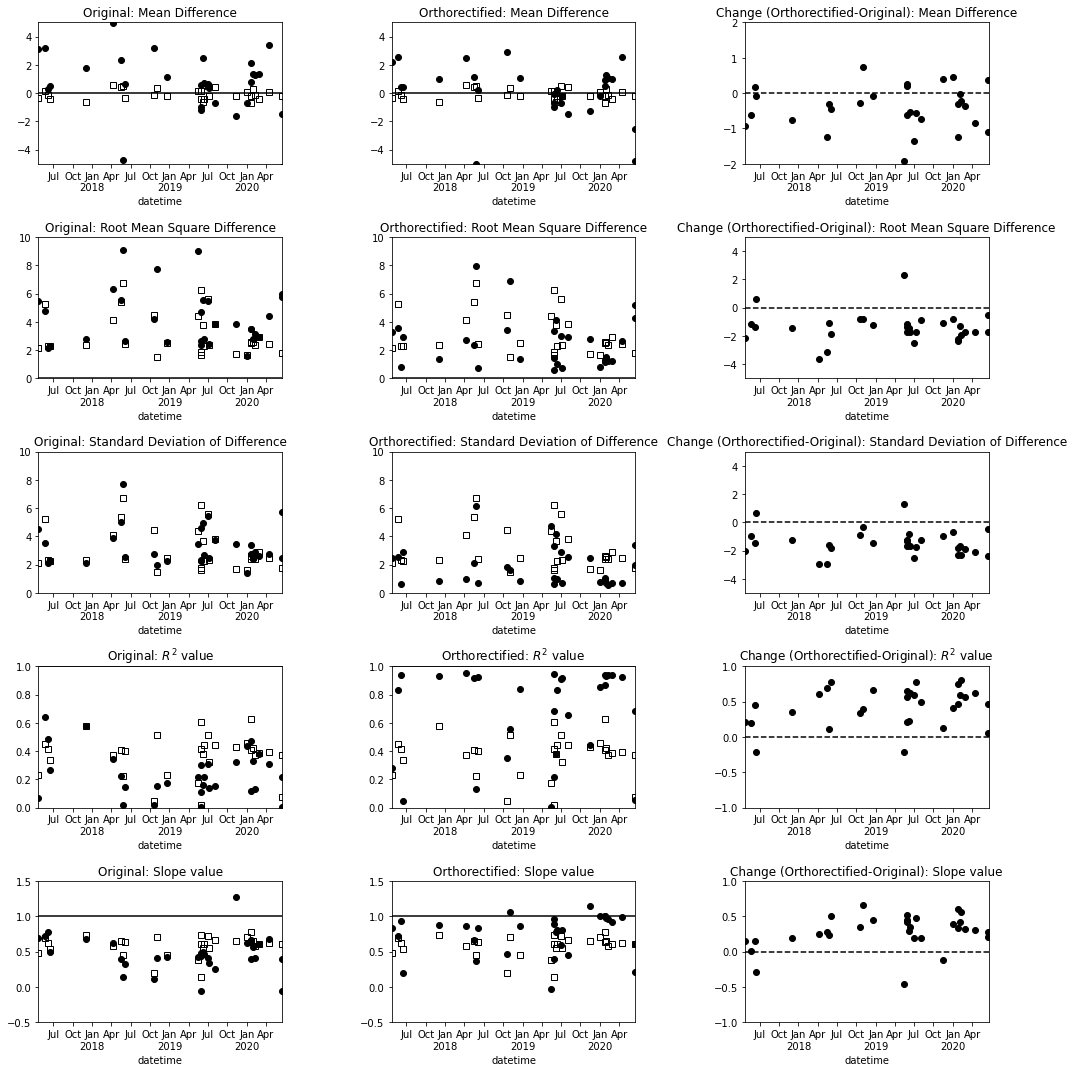

In [9]:
fig, axes = plt.subplots(5,3,figsize=(15,15), tight_layout=True)

ax = axes.flatten()

### Original stats

df_original_tb.ast_mod_mean_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[0], label='MODIS - ASTER')
df_original_tb.ast_goes_mean_diff.plot(linestyle='none', marker='o',  c='k',  ax=ax[0], label='GOES - ASTER')
#df_original_tb.mod_goes_mean_diff.plot(linestyle='none', marker='+', c='#1b9e77', ax=ax[0], label='GOES - MODIS')
ax[0].set_title('Original: Mean Difference')
ax[0].set_ylim(-5,5)
ax[0].axhline(0,c='k')

df_original_tb.ast_mod_rms_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[3], label='MODIS - ASTER')
df_original_tb.ast_goes_rms_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[3],  label='GOES - ASTER')
#df_original_tb.mod_goes_rms_diff.plot(linestyle='none', marker='+',  c='#1b9e77',ax=ax[3],  label='GOES - MODIS')
ax[3].set_title('Original: Root Mean Square Difference')
ax[3].set_ylim(0,10)
ax[3].axhline(0,c='k')

df_original_tb.ast_mod_std_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[6], label='MODIS - ASTER')
df_original_tb.ast_goes_std_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[6],  label='GOES - ASTER')
#df_original_tb.mod_goes_std_diff.plot(linestyle='none', marker='+',  c='#1b9e77',ax=ax[6],  label='GOES - MODIS')
ax[6].set_title('Original: Standard Deviation of Difference')
ax[6].set_ylim(0,10)

df_original_tb.ast_mod_r2_value.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[9], label='MODIS : ASTER')
df_original_tb.ast_goes_r2_value.plot(linestyle='none', marker='o',  c='k', ax=ax[9],  label='GOES : ASTER')
#df_original_tb.mod_goes_r2_value.plot(linestyle='none', marker='+',  c='#1b9e77',ax=ax[9],  label='GOES : MODIS')
ax[9].set_title('Original: $R^2$ value')
ax[9].set_ylim(0,1)
ax[9].axhline(1,c='k')

df_original_tb.ast_mod_slope.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[12], label='MODIS : ASTER')
df_original_tb.ast_goes_slope.plot(linestyle='none',marker='o',  c='k', ax=ax[12],  label='GOES : ASTER')
#df_original_tb.mod_goes_slope.plot(linestyle='none', marker='+',  c='#1b9e77',ax=ax[12],  label='GOES : MODIS')
ax[12].set_title('Original: Slope value')
ax[12].set_ylim(-0.5,1.5)
ax[12].axhline(1,c='k')

### Orthorectified stats

df_ortho_tb.ast_mod_mean_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[1], label='MODIS - ASTER')
df_ortho_tb.ast_goes_mean_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[1], label='GOES - ASTER')
#df_ortho_tb.mod_goes_mean_diff.plot(linestyle='none', marker='+', c='#1b9e77', ax=ax[1], label='GOES - MODIS')
ax[1].set_title('Orthorectified: Mean Difference')
ax[1].set_ylim(-5,5)
ax[1].axhline(0,c='k')

df_ortho_tb.ast_mod_rms_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[4], label='MODIS - ASTER')
df_ortho_tb.ast_goes_rms_diff.plot(linestyle='none',marker='o',  c='k', ax=ax[4],  label='GOES - ASTER')
#df_ortho_tb.mod_goes_rms_diff.plot(linestyle='none', marker='+',  c='#1b9e77',ax=ax[4],  label='GOES - MODIS')
ax[4].set_title('Orthorectified: Root Mean Square Difference')
ax[4].set_ylim(0,10)
ax[4].axhline(0,c='k')

df_ortho_tb.ast_mod_std_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[7], label='MODIS - ASTER')
df_ortho_tb.ast_goes_std_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[7],  label='GOES - ASTER')
#df_ortho_tb.mod_goes_std_diff.plot(linestyle='none', marker='+',  c='#1b9e77',ax=ax[7],  label='GOES - MODIS')
ax[7].set_title('Orthorectified: Standard Deviation of Difference')
ax[7].set_ylim(0,10)

df_ortho_tb.ast_mod_r2_value.plot(linestyle='none',marker='s',  mfc='none', mec='k', ax=ax[10], label='MODIS : ASTER')
df_ortho_tb.ast_goes_r2_value.plot(linestyle='none', marker='o',  c='k', ax=ax[10],  label='GOES : ASTER')
#df_ortho_tb.mod_goes_r2_value.plot(linestyle='none', marker='+',  c='#1b9e77',ax=ax[10],  label='GOES : MODIS')
ax[10].set_title('Orthorectified: $R^2$ value')
ax[10].set_ylim(0,1)
ax[10].axhline(1,c='k')

df_ortho_tb.ast_mod_slope.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[13], label='MODIS : ASTER')
df_ortho_tb.ast_goes_slope.plot(linestyle='none', marker='o',  c='k', ax=ax[13],  label='GOES : ASTER')
#df_ortho_tb.mod_goes_slope.plot(linestyle='none', marker='+',  c='#1b9e77',ax=ax[13],  label='GOES : MODIS')
ax[13].set_title('Orthorectified: Slope value')
ax[13].set_ylim(-0.5,1.5)
ax[13].axhline(1,c='k')


### Change (original - ortho) stats
# skipping MODIS - ASTER since there is no change
#df_change_tb.ast_mod_mean_diff.plot(linestyle='none', marker='.', c='#7570b3', ax=ax[2], label='MODIS - ASTER')
df_change_tb.ast_goes_mean_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[2], label='GOES - ASTER')
#df_change_tb.mod_goes_mean_diff.plot(linestyle='none', marker='+',  c='#1b9e77',ax=ax[2], label='GOES - MODIS')
ax[2].set_title('Change (Orthorectified-Original): Mean Difference')
ax[2].set_ylim(-2,2)
ax[2].axhline(0,c='k',linestyle='--')

#df_change_tb.ast_mod_rms_diff.plot(linestyle='none', marker='.', c='#7570b3',  ax=ax[5], label='MODIS - ASTER')
df_change_tb.ast_goes_rms_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[5],  label='GOES - ASTER')
#df_change_tb.mod_goes_rms_diff.plot(linestyle='none', marker='+',  c='#1b9e77',ax=ax[5],  label='GOES - MODIS')
ax[5].set_title('Change (Orthorectified-Original): Root Mean Square Difference')
ax[5].set_ylim(-5,5)
ax[5].axhline(0,c='k',linestyle='--')

#df_change_tb.ast_mod_std_diff.plot(linestyle='none', marker='.', c='#7570b3',  ax=ax[8], label='MODIS - ASTER')
df_change_tb.ast_goes_std_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[8],  label='GOES - ASTER')
#df_change_tb.mod_goes_std_diff.plot(linestyle='none', marker='+',  c='#1b9e77',ax=ax[8],  label='GOES - MODIS')
ax[8].set_title('Change (Orthorectified-Original): Standard Deviation of Difference')
ax[8].set_ylim(-5,5)
ax[8].axhline(0,c='k',linestyle='--')

#df_change_tb.ast_mod_r2_value.plot(linestyle='none', marker='.', c='#7570b3',  ax=ax[11], label='MODIS : ASTER')
df_change_tb.ast_goes_r2_value.plot(linestyle='none', marker='o',  c='k', ax=ax[11],  label='GOES : ASTER')
#df_change_tb.mod_goes_r2_value.plot(linestyle='none', marker='+',  c='#1b9e77',ax=ax[11],  label='GOES : MODIS')
ax[11].set_title('Change (Orthorectified-Original): $R^2$ value')
ax[11].set_ylim(-1,1)
ax[11].axhline(0,c='k',linestyle='--')

#df_change_tb.ast_mod_slope.plot(linestyle='none', marker='.', c='#7570b3',  ax=ax[14], label='MODIS : ASTER')
df_change_tb.ast_goes_slope.plot(linestyle='none', marker='o',  c='k', ax=ax[14],  label='GOES : ASTER')
#df_change_tb.mod_goes_slope.plot(linestyle='none', marker='+',  c='#1b9e77',ax=ax[14],  label='GOES : MODIS')
ax[14].set_title('Change (Orthorectified-Original): Slope value')
ax[14].set_ylim(-1,1)
ax[14].axhline(0,c='k',linestyle='--')

for this_ax in ax:
    format_date_ax(this_ax)
    #this_ax.legend(loc='best')
